## Background:
What is retention and cohort analysis? A cohort is a group of users who share something in common, be it their
sign-up date, first purchase month, birth date, acquisition channel, etc. Cohort analysis is the method by which
these groups are tracked over time, helping you spot trends, understand repeat behaviors (purchases,
engagement, amount spent, etc.), and monitor your customer and revenue retention. It’s common for cohorts to
be created based on a customer’s first usage of the platform, where "usage" is dependent on your business’
key metrics. For Uber or Lyft, usage would be booking a trip through one of their apps. For GrubHub, it’s
ordering some food. For AirBnB, it’s booking a stay. With these companies, a purchase is at their core, be it
taking a trip or ordering dinner — their revenues are tied to their users’ purchase behavior. In others, a purchase
is not central to the business model and the business is more interested in "engagement" with the platform.
Facebook and Twitter are examples of this - are you visiting their sites every day? Are you performing some
action on them


### Import the appropriate packages ###

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import numpy as np
import matplotlib.colors as mcolors

### Read the appropriate excel file from online resource ###

In [2]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx', dtype={'CustomerID': str,
                          'InvoiceID': str},
                   parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)


In [3]:
data.query('InvoiceNo==536365')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom


In [4]:
df=data

In [5]:
df.info() #Use df.info to check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.dropna(subset=['CustomerID'],inplace=True) #Drop the rows with missing values (hint: df.dropna)

In [8]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


## Calculate Mutiple Order Percent ##
calculate the percent of customers with multiple order

In [10]:
#dataframe.nunique() function return Series with number of distinct observations over requested axis.
orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
orders

CustomerID
12346     2
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [15]:
df.groupby(['CustomerID']).nunique()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
CustomerID,,,,,,,,
12346,2,1,1,2,2,1,1,1
12347,7,103,103,15,7,32,1,1
12348,4,22,22,10,4,7,1,1
12349,1,73,73,12,1,32,1,1
12350,1,17,17,5,1,7,1,1
...,...,...,...,...,...,...,...,...
18280,1,10,10,5,1,7,1,1
18281,1,7,7,4,1,4,1,1
18282,3,12,12,9,3,9,1,1


In [11]:
np.sum(orders>1) #sum all the number of invoice number >1

3059

In [9]:
orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
multi_orders=np.sum(orders>1)/df['CustomerID'].nunique()
multi_orders


0.69967978042086

## Calculate the time difference between orders/invoices for each customer and determine the time interval (use 80 percentile) ##

Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [17]:
#get date of the invoice date
df['Date']=pd.to_datetime(df['InvoiceDate'].apply(lambda x:x.date()))
df['Date']


0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: Date, Length: 406829, dtype: datetime64[ns]

In [20]:
df_tmp = df[['CustomerID', 'InvoiceNo', 'Date']].drop_duplicates()
df_tmp

,CustomerID,InvoiceNo,Date
0,17850,536365,2010-12-01
7,17850,536366,2010-12-01
9,13047,536367,2010-12-01
21,13047,536368,2010-12-01
25,13047,536369,2010-12-01
...,...,...,...
541865,13777,581583,2011-12-09
541867,13777,581584,2011-12-09
541869,15804,581585,2011-12-09
541890,13113,581586,2011-12-09


In [22]:
df_tmp.sort_values(['CustomerID','Date'])['Date']

61619    2011-01-18
61624    2011-01-18
14938    2010-12-07
72246    2011-01-26
148285   2011-04-07
            ...    
514067   2011-11-30
530454   2011-12-06
198716   2011-05-22
392716   2011-10-12
423939   2011-10-28
Name: Date, Length: 22190, dtype: datetime64[ns]

In [23]:
df_tmp['Previous_date']=df_tmp.sort_values(['CustomerID','Date'])['Date'].shift()
df_tmp['Previous_date']

0        2011-05-05
7        2010-12-01
9        2011-11-09
21       2010-12-01
25       2010-12-01
            ...    
541865   2011-12-01
541867   2011-12-09
541869   2011-11-28
541890   2011-11-25
541894   2011-09-27
Name: Previous_date, Length: 22190, dtype: datetime64[ns]

In [24]:
df_tmp['Previous_id']=df_tmp.sort_values(['CustomerID','Date'])['CustomerID'].shift()

In [28]:
df_tmp=df_tmp.assign(time_difference=(df_tmp.Date-df_tmp.Previous_date).where(df_tmp.CustomerID==df_tmp.Previous_id))
df_tmp


,CustomerID,InvoiceNo,Date,Previous_date,Previous_id,time_difference
7,17850,536366,2010-12-01,2010-12-01,17850,0 days
21,13047,536368,2010-12-01,2010-12-01,13047,0 days
25,13047,536369,2010-12-01,2010-12-01,13047,0 days
47,17850,536372,2010-12-01,2010-12-01,17850,0 days
49,17850,536373,2010-12-01,2010-12-01,17850,0 days
...,...,...,...,...,...,...
541865,13777,581583,2011-12-09,2011-12-01,13777,8 days
541867,13777,581584,2011-12-09,2011-12-09,13777,0 days
541869,15804,581585,2011-12-09,2011-11-28,15804,11 days
541890,13113,581586,2011-12-09,2011-11-25,13113,14 days


In [29]:
df_tmp=df_tmp[df_tmp.time_difference.notnull()]
df_tmp

,CustomerID,InvoiceNo,Date,Previous_date,Previous_id,time_difference
7,17850,536366,2010-12-01,2010-12-01,17850,0 days
21,13047,536368,2010-12-01,2010-12-01,13047,0 days
25,13047,536369,2010-12-01,2010-12-01,13047,0 days
47,17850,536372,2010-12-01,2010-12-01,17850,0 days
49,17850,536373,2010-12-01,2010-12-01,17850,0 days
...,...,...,...,...,...,...
541865,13777,581583,2011-12-09,2011-12-01,13777,8 days
541867,13777,581584,2011-12-09,2011-12-09,13777,0 days
541869,15804,581585,2011-12-09,2011-11-28,15804,11 days
541890,13113,581586,2011-12-09,2011-11-25,13113,14 days


In [30]:
df_tmp.time_difference=df_tmp.time_difference.apply(lambda x:x.days)
df_tmp

,CustomerID,InvoiceNo,Date,Previous_date,Previous_id,time_difference
7,17850,536366,2010-12-01,2010-12-01,17850,0
21,13047,536368,2010-12-01,2010-12-01,13047,0
25,13047,536369,2010-12-01,2010-12-01,13047,0
47,17850,536372,2010-12-01,2010-12-01,17850,0
49,17850,536373,2010-12-01,2010-12-01,17850,0
...,...,...,...,...,...,...
541865,13777,581583,2011-12-09,2011-12-01,13777,8
541867,13777,581584,2011-12-09,2011-12-09,13777,0
541869,15804,581585,2011-12-09,2011-11-28,15804,11
541890,13113,581586,2011-12-09,2011-11-25,13113,14


(array([12829.,  2706.,  1027.,   545.,   288.,   174.,   109.,    56.,
           48.,    36.]),
 array([  0. ,  36.6,  73.2, 109.8, 146.4, 183. , 219.6, 256.2, 292.8,
        329.4, 366. ]),
 <a list of 10 Patch objects>)

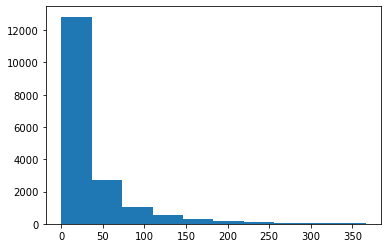

In [31]:
plt.hist(df_tmp.time_difference)

In [32]:
np.percentile(df_tmp.time_difference,80) #80th percentile of the array

51.0

## Get the distribution for the number of orders (x-axis for number of orders y-axis for number of customers)##

In [33]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique().to_frame().reset_index()
n_orders.rename(columns={'InvoiceNo':'NumberofOrders'},inplace=True)

orders=n_orders.groupby('NumberofOrders')['CustomerID'].nunique()

In [34]:
df.groupby(['CustomerID'])['InvoiceNo'].nunique()
#get the number of invoiceno

CustomerID
12346     2
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [35]:
n_orders


,CustomerID,NumberofOrders
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [36]:
orders #1313 are number of customers? What is 65? 有1313个customer只买一单？

NumberofOrders
1      1313
2       817
3       490
4       377
5       288
       ... 
118       2
128       1
169       1
224       1
248       1
Name: CustomerID, Length: 65, dtype: int64

In [39]:
orders.shape

(65,)

## Plot the Order Distribution##

Matplotlib: Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on.

Seaborn: Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It specializes in statistics visualization and is used if one has to summarize data in visualizations and also show the distribution in the data. 

(array([57.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,  82.6, 164.2, 245.8, 327.4, 409. , 490.6, 572.2, 653.8,
        735.4, 817. ]),
 <a list of 10 Patch objects>)

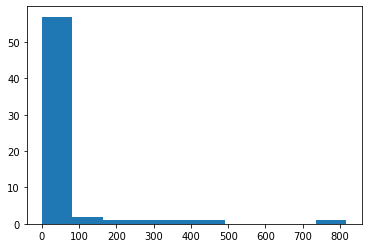

In [187]:
plt.hist(orders)

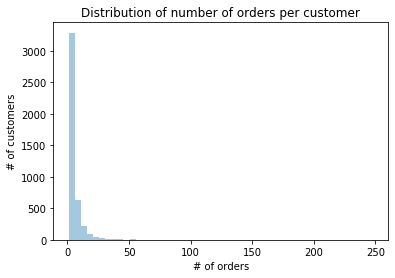

In [22]:
#what is the difference between these two graphs，为什么一个是50 一个是3000
ax = sns.distplot(orders,kde=False,  hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [39]:
orders.sort_values(ascending=False)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
        ... 
13828      1
13829      1
16123      1
13833      1
15300      1
Name: InvoiceNo, Length: 4372, dtype: int64

In [40]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

## get the cohort for each customers
Cohort is the first purchase month for each customer
Transform Function Reference
https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/

In [41]:
# Get the cohort for each customer 
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min') \
                 .dt.to_period('M') 
df
#transform the minimum invoicedate?

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047,536369,2010-12-01 08:35:00,2010-12,2010-12
...,...,...,...,...,...
541865,13777,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113,581586,2011-12-09 12:49:00,2011-12,2010-12


### Get the period_number that measure how many month are between cohort month and order month

In [42]:
df_cohort = df.groupby(['cohort', 'order_month'])['CustomerID'].nunique().reset_index()

df_cohort.columns=['cohort', 'order_month', 'customer_number']
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
#attrgetter to get rid off the unit
df_cohort

,cohort,order_month,customer_number,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [43]:

df

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047,536369,2010-12-01 08:35:00,2010-12,2010-12
...,...,...,...,...,...
541865,13777,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113,581586,2011-12-09 12:49:00,2011-12,2010-12


### Plot the distribution using seaborn line chart

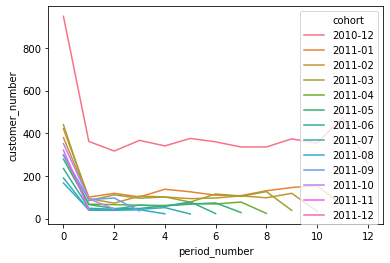

In [45]:
sns.lineplot(data=df_cohort,x='period_number',y='customer_number',hue='cohort')

In [46]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'customer_number')

In [47]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cohort_pivot.iloc[:,0]

cohort
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [48]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [50]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
cohort_size

cohort
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

#????graph

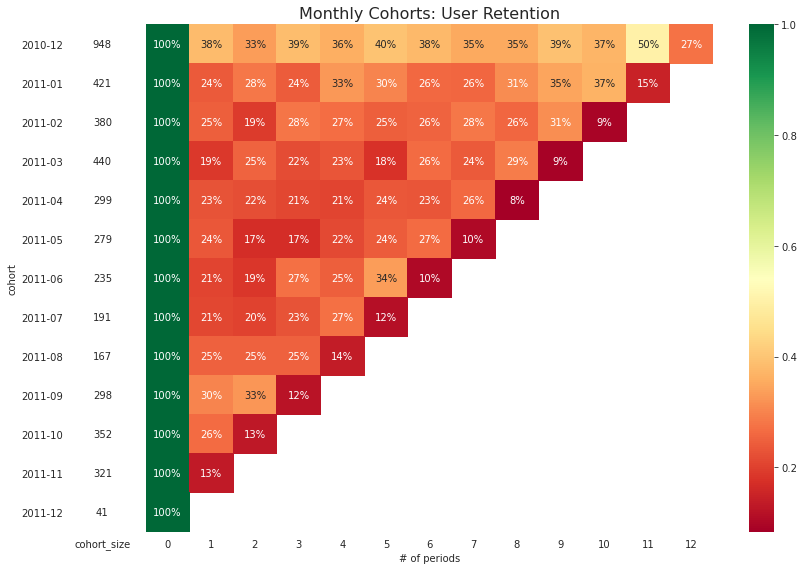

In [51]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    